Привет, Наталья! Как дела?) ☺️
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы

И рекомендую писать введение от первого лица. Так работа выглядит более самостоятельной)
</div>

## Подготовка данных

In [171]:
conda update -n base conda

Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/conda/gateways/connection/__init__.py", line 21, in <module>
    from requests import ConnectionError, HTTPError, Session
ImportError: cannot import name 'ConnectionError' from 'requests' (unknown location)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/conda/exceptions.py", line 1079, in __call__
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/conda/cli/main.py", line 84, in _main
    exit_code = do_call(args, p)
  File "/opt/conda/lib/python3.9/site-packages/conda/cli/conda_argparse.py", line 81, in do_call
    module = import_module(relative_mod, __name__.rsplit('.', 1)[0])
  File "/opt/conda/lib/python3.9/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030

In [172]:
import pandas as pd
import numpy as np
import time

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.dummy import DummyRegressor

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Правильное решение — выделять отдельную ячейку в начале проекта под подключение библиотек и настройки. Tак код легче поддерживать 👌 Но также стоит соблюдать рекомендации PEP-8 при написании кода. У импортов есть тоже определенные правила. Это сделано для повышения читабельности и простоты работы с кодом.

https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</div>

In [173]:
autos = pd.read_csv('/datasets/autos.csv')

In [174]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Выводы:

Есть пропуски в признаках
- VehicalType
- Gearbox
- Model
- fueltype
- nor repaired

Есть признаки, которые не понадобятся для модели:

 - DateCrawled
 - RegistrationMonth
 - DateCreated
 - LastSeen
 - PostalCode
 - LastSeen
 
Из информативных признаков два количественных  - Power и Kilometer, остальные категориальные. 


Посмотрим теперь ближе на нужные нам признаки

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Спасибо за информативный вывод)
</div>

### Цена автомобиля

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
10%         499.000000
50%        2700.000000
99%       18800.000000
max       20000.000000
Name: Price, dtype: float64

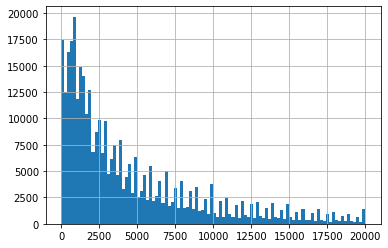

In [175]:
autos.Price.hist(bins = 100)
autos.Price.describe(percentiles = [.1,.99])

Внешне распределение выглядит адекватно, но из описания видно, что нужно удалить нулевые и слишком маленькие значения цены. Так как речь идет об авто с пробегом, то цена может быть и совсем маленькая, поэтому определим границу в 100. Все что ниже будет считать ошибками заполнения данных. 

In [176]:
autos = autos.drop(autos[autos['Price']<100].index)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

### Количество фотографий

In [177]:
autos.NumberOfPictures.value_counts()

0    341055
Name: NumberOfPictures, dtype: int64

Этот признак мог бы влиять на цену, но оказался бесполезным

### Год регистрации авто

2000    22661
1999    21846
2005    21363
2006    19641
2001    19574
        ...  
1949        1
2222        1
5300        1
8888        1
2290        1
Name: RegistrationYear, Length: 138, dtype: int64

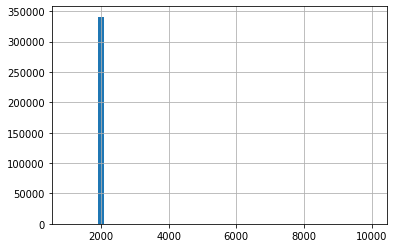

In [178]:
autos.RegistrationYear.hist(bins = 50)
autos.RegistrationYear.value_counts()


Необходимо удалить все объекты с годом регистрации больше 2022 и меньше 1949

In [179]:
autos = autos.drop(autos[autos['RegistrationYear']>2016].index)
autos = autos.drop(autos[autos['RegistrationYear']<1949].index)

2000    22661
1999    21846
2005    21363
2006    19641
2001    19574
        ...  
1957       13
1951       10
1954        9
1952        8
1949        1
Name: RegistrationYear, Length: 68, dtype: int64

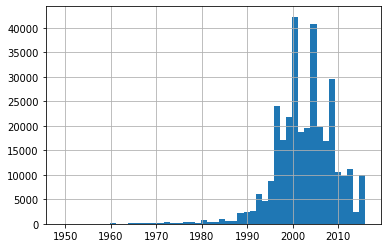

In [180]:
autos.RegistrationYear.hist(bins = 50)
autos.RegistrationYear.value_counts()

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Год регистрации нужно ограничить сверху 2016 годом. Максимальный год — год выгрузки (date_crawled) 2016.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Изменила верхнюю границу на 2016
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

### Мощность авто

count    327224.000000
mean        112.360903
std         185.292462
min           0.000000
50%         105.000000
99%         300.000000
max       20000.000000
Name: Power, dtype: float64

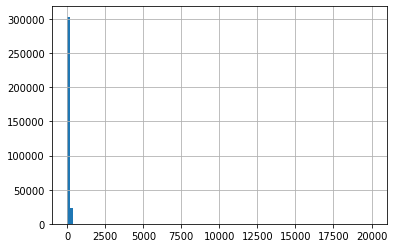

In [181]:
autos.Power.hist(bins= 100)
autos.Power.describe(percentiles = [.99])

Видно, что есть выпадающие значения. Уберем все объекты с нулевой мощностью и выше 1000

count    295410.000000
mean        120.793910
std          54.743019
min           1.000000
50%         111.000000
99%         305.000000
max        1000.000000
Name: Power, dtype: float64

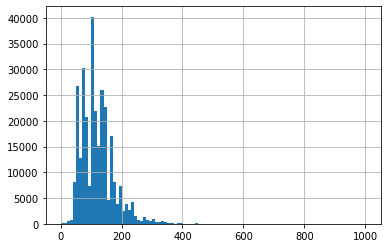

In [182]:
autos.drop(autos[(autos.Power ==0) | (autos.Power >1000)].index,inplace = True)
autos.Power.hist(bins= 100)
autos.Power.describe(percentiles = [.99])

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Мощность ограничили 👍
</div>

### Вид топлива

In [183]:
autos.FuelType.value_counts()

petrol      186819
gasoline     87717
lpg           4677
cng            480
hybrid         201
other           90
electric        75
Name: FuelType, dtype: int64

Petrol и Gasoline, если верить википедии, это одно и то же. Поэтому переименуем в одну категорию

In [184]:
autos.FuelType.replace(to_replace = 'gasoline',value ='petrol',inplace = True)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Согласен 👍
</div>

### Удаление дубликатов

In [185]:
autos.drop_duplicates(keep='first',inplace=True)

<div class="alert alert-block alert-info">
<b>Изменения:</b> Добавила удаление дубликатов до изменения данных
</div>

### Обработка пропусков

Пропуски в категориальных признаках заполнить осмысленно не получится. Поэтому исопльзуем заглушки

In [186]:
nan_columns = ['VehicleType','Gearbox','Model','FuelType','NotRepaired']

In [187]:
autos[nan_columns] = autos[nan_columns].fillna(value = 'N/A')

In [188]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295406 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        295406 non-null  object
 1   Price              295406 non-null  int64 
 2   VehicleType        295406 non-null  object
 3   RegistrationYear   295406 non-null  int64 
 4   Gearbox            295406 non-null  object
 5   Power              295406 non-null  int64 
 6   Model              295406 non-null  object
 7   Kilometer          295406 non-null  int64 
 8   RegistrationMonth  295406 non-null  int64 
 9   FuelType           295406 non-null  object
 10  Brand              295406 non-null  object
 11  NotRepaired        295406 non-null  object
 12  DateCreated        295406 non-null  object
 13  NumberOfPictures   295406 non-null  int64 
 14  PostalCode         295406 non-null  int64 
 15  LastSeen           295406 non-null  object
dtypes: int64(7), object(

Вывод:

Пришлось удалить около 15% данных. Это довольно много, но в данном случае заполнять пробелы вместо удаления было бы нецелесообразно

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Пропуски успешно заполнены 👍 Модели теперь не будут капризничать)
</div>

### Подготовка данных для модели

In [189]:
#убираем неинформативные столбцы

data = autos.drop(columns = ['DateCrawled','RegistrationMonth', 'DateCreated','LastSeen', 'NumberOfPictures','PostalCode'])

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Стоит проверить данные на наличие дубликатов
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> добавила выше очистку от дубликатов
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

In [190]:
data.nunique()

Price               3548
VehicleType            9
RegistrationYear      68
Gearbox                3
Power                478
Model                250
Kilometer             13
FuelType               7
Brand                 40
NotRepaired            3
dtype: int64

Выделим отдельно категориальные и количественные признаки. Причем NotRepaired и Gearbox пока оставим отдельно, так как у них только две (плюс N/A) возможных категории. Для них используем OH кодирование.  По остальным категориальным признакам применим бинарное кодирование, чтобы не множить лишних столбцов и ускорить работу модели. 

In [191]:
cat_columns = ['RegistrationYear', 'VehicleType','Model','FuelType','Brand']
num_columns = ['Power','Kilometer']

In [192]:
encoder = ce.BinaryEncoder(cols=cat_columns, drop_invariant = False)
encoder.fit(data)
data_enc = encoder.transform(data)


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Хорошо, что преобразованы только категориальные признаки 👍
</div>

In [193]:
data_enc = pd.get_dummies(data_enc, 
                      columns = ['Gearbox','NotRepaired'],
                      drop_first = True)

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Кодировать данные стоит после разбиения. Так у нас не будет утечки данных.

Подробнее об этом можно прочитать здесь https://datascience.stackexchange.com/questions/108663/why-label-encoding-before-split-is-data-leakage
    
Также советую для линейных моделей использовать полностью OHE кодирвание, а для "деревьев" - Ordinal Encoding
</div>

Выделим целевой признак, а также обучающую и тестовую выборки

In [194]:
X = data_enc.drop(columns =['Price'], axis =1)
y = data_enc['Price']

In [195]:
X_train, X_valid,  y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

X_valid, X_test,  y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=1)

<div class="alert alert-block alert-info">
<b>Изменения:</b> Поменяла подход и добавила валидационную выборку. Раньше была только тестовая
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

Теперь проведем масштабирование количественных признаков

In [196]:
scaler = StandardScaler().fit(X_train[num_columns].values)

X_train[num_columns] = scaler.transform(X_train[num_columns].values)
X_test[num_columns] = scaler.transform(X_test[num_columns].values)
X_valid[num_columns] = scaler.transform(X_valid[num_columns].values)



/tmp/ipykernel_1395/3417274158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_columns] = scaler.transform(X_train[num_columns].values)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [199]:
X_test[num_columns] 

,Power,Kilometer
202149,-0.744547,-1.575731
76476,0.711256,0.591571
258275,-0.089436,-0.762993
333179,-0.944720,0.591571
87628,-1.108498,-3.336664
...,...,...
202966,0.019750,0.591571
226035,0.256318,-1.304818
70496,-0.708152,0.591571
213973,0.401898,-1.575731


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отлично, признаки масштабированы 👍 Не забыли, что fit нужно делать только на train выборке.
</div>

## Обучение моделей

Применим два варианта бустинга и несколько линейных моделей для сравнения

In [200]:
cbr = CatBoostRegressor(silent = True, random_state =1)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10]}

grid_search_result = cbr.grid_search(grid, X=X_train, y=y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 2210.456776
bestIteration = 999

0:	loss: 2210.4567763	best: 2210.4567763 (0)	total: 19s	remaining: 1m 35s

bestTest = 1973.281801
bestIteration = 999

1:	loss: 1973.2818013	best: 1973.2818013 (1)	total: 37s	remaining: 1m 13s

bestTest = 1830.734833
bestIteration = 999

2:	loss: 1830.7348327	best: 1830.7348327 (2)	total: 1m 1s	remaining: 1m 1s

bestTest = 1704.424608
bestIteration = 997

3:	loss: 1704.4246078	best: 1704.4246078 (3)	total: 1m 26s	remaining: 43.1s

bestTest = 1613.49748
bestIteration = 999

4:	loss: 1613.4974797	best: 1613.4974797 (4)	total: 2m 32s	remaining: 30.5s

bestTest = 1576.623944
bestIteration = 993

5:	loss: 1576.6239445	best: 1576.6239445 (5)	total: 3m 35s	remaining: 0us
Estimating final quality...
Training on fold [0/3]

bestTest = 1567.901501
bestIteration = 998

Training on fold [1/3]

bestTest = 1581.556527
bestIteration = 999

Training on fold [2/3]

bestTest = 1585.78297
bestIteration = 999



In [201]:
gbm = lightgbm.LGBMRegressor(random_state =1)

RFR = RandomForestRegressor(random_state=1)


<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Стоит добавить оптимизацию (подбор гиперпараметров) хотя бы для одной модели.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Добавила подбор параметров. Только для регрессии CatBoost, чтобы код был не слишком долгим.
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Можешь добавить обучение одной простой модели?) Например, Случайный лес
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Добавила выше модель со случайным лесом
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

In [202]:
results = pd.DataFrame(columns =['model','RMSE', 'fit time','prediction time'])

for model in [cbr,gbm, RFR]:
    
    start_fit = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time()-start_fit
    
    start_pred = time.time()
    y_pred = model.predict(X_valid)
    pred_time = time.time()-start_pred
    
    results = results.append({'model': model,
                             'RMSE': mean_squared_error(y_valid, y_pred) ** 0.5, 
                              'fit time': fit_time,
                              'prediction time': pred_time}, 
                             ignore_index=True)  
results

,model,RMSE,fit time,prediction time
0,<catboost.core.CatBoostRegressor object at 0x7...,1542.602722,72.864227,0.328459
1,LGBMRegressor(random_state=1),1861.884904,380.983899,0.591447
2,"(DecisionTreeRegressor(max_features='auto', ra...",1770.902252,95.878635,2.564658


In [203]:
#проверка на адекватность. сравнение с константным регрессором. 

dummy_pred = DummyRegressor().fit(X_train,y_train).predict(X_test)
mean_squared_error(y_test, dummy_pred) ** 0.5


4599.128295119111

Промежуточные итоги:

 - Обучено три модели. Для CatBoostRegressor проведен подбор гиперпараметров
 - Все три модели на тестовой выборке достгили требуемого RMSE меньше 2500
 - Минимальное время обучения - 71 секунда для CatBoost Regressor
 - Дольше всех обучается LGBM - 377 секунд
 - Лучшая метрика у СatBoost - 1525
 - Предсказания строятся дольше всех у модели случайного леса
 - По сравнению с константной моделью все три модели показали себя адекватными

## Анализ моделей

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

В анализе моделей нужно смотреть на время их обучения и предсказания. Можешь добавить?)

В сравнении нужно смотреть отдельно на время обучения и время предсказания для каждой модели.
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Если валидациционной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется с помощью кросс-валидации на тренировочной выборке
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = model.predict(X_train)
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Добавила в сравнительную таблицу выше измерения времени обучения и предсказания
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

Из итоговой таблицы видно, что лучше всех справляется CatBoostRegressor. Ее можно порекомендовать заказчику для нового сервиса. 
Проведем финальное тестирование модели:

In [204]:
  
y_pred = cbr.predict(X_test)
mean_squared_error(y_test, y_pred) ** 0.5


1525.357975406152

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

После анализа моделей нужно порекомендовать заказчику одну модель и провести на ней финальное тестирование.

Рассчитай финальную метрику лучшей модели на тестовой выборке (до этого тестовая выборка нигде не должна использоваться). RMSE должно быть меньше 2500. Если метрика не дотягивает, попробуй исправить мои замечания, также можешь потюнить гиперпараметры (на этапе обучения моделей, не на тестовой выборке!)
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Добавила финальное тестирование
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

**Выводы:**

- Проведен обзор данных, выделены информативные для обучения признаки

- Удалены выпдающие значения и дубликаты 

- Проведено кодирование и масштабирование данных

- Обучено три модели, проанализировано время предсказания и качество моделей

- Все модели оказались адекватны по сравнению с константной моделью

- Достигнута требуемая RMSE. Лучшие результаты - 1525 у CatBoost 

**Для сервиса по определению рыночной стоимости рекомендуется CatBoostRegressor с параметрами, указанными ниже. RMSE на тестовой выборке для этой модели составила**

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

К выводу стоит добавить краткий обзор выполненной работы.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Дополнила вывод
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Большое спасибо за полезные ссылки! Это был не очень понятный по теории спринт, так что очень пригодились и еще пригодятсяэти рекомендации
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Спасибо за качественный проект)
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"